### **Data Exploration**

In [1]:
!gem install gist

/bin/bash: line 1: gem: command not found


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
apples_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IBM Advanced Data Science Cap/data/apple_quality.csv")

In [ ]:
apples_df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
apples_df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [ ]:
apples_df.shape

(4001, 9)

In [ ]:
apples_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
#One entry might have missing data because 'Acidity' has 4001 non-null values, while all of the other features have 4000 non-null columns. Can tell through apples_df.info().
#I'm just going to delete the row with null values.

In [ ]:
#Acidity has numeric values, but is classified as an object.

In [ ]:
apples_df.isnull()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3996,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False
3999,False,False,False,False,False,False,False,False,False


In [ ]:
#Looks like last row is the row with null values.
apples_df.dropna(inplace=True)

In [ ]:
apples_df.isnull()
#Null row appears to be taken care of. 4000 rows of good data. Yey.

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3995,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False


In [ ]:
apples_df['Acidity'] = pd.to_numeric(apples_df['Acidity'])

In [ ]:
apples_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [ ]:
#Now all the features that should be floats are floats.

In [ ]:
#Now I probably want to encode the Quality feature as a number. 0 for 'bad', 1 for 'good' is the most intuitive.
apples_df['Quality'] = apples_df['Quality'].map(dict(good=1, bad=0))


In [ ]:
apples_df.head(10)
#Yey, it worked!

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


In [ ]:
#Rename 'Quality' column to slightly more intuitive 'Good'.
apples_df.rename(columns={'Quality': 'Good'}, inplace=True)


In [ ]:
df = apples_df

In [ ]:
# Count missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

# Percentage of missing values
percent_missing = (missing_values / len(df)) * 100
print(percent_missing)


A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Good           0
dtype: int64
A_id           0.0
Size           0.0
Weight         0.0
Sweetness      0.0
Crunchiness    0.0
Juiciness      0.0
Ripeness       0.0
Acidity        0.0
Good           0.0
dtype: float64


In [ ]:
# Find duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

# Remove duplicates, if necessary
df = df.drop_duplicates()


Number of duplicate entries: 0


In [ ]:
# Check data types
print(df.dtypes)

# Convert data types, for example, converting a column to datetime
# df['date_column'] = pd.to_datetime(df['date_column'])


A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Good             int64
dtype: object


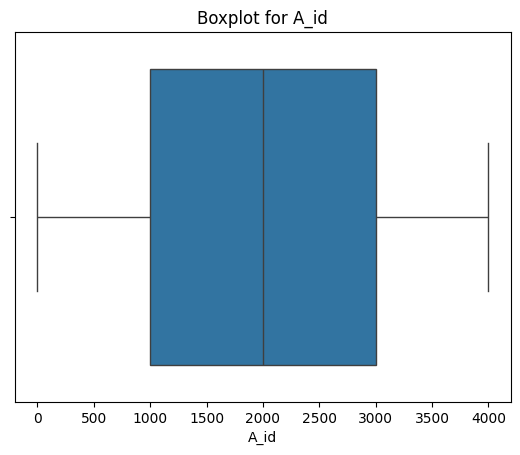

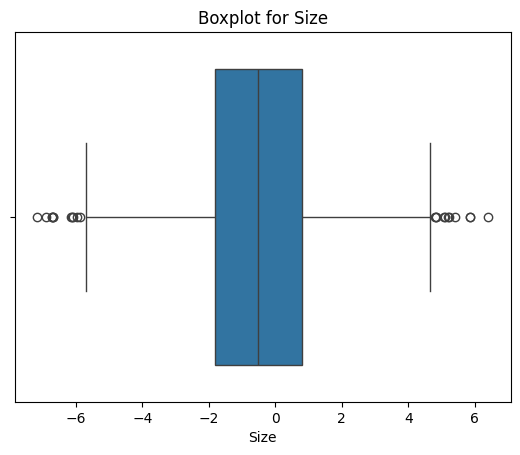

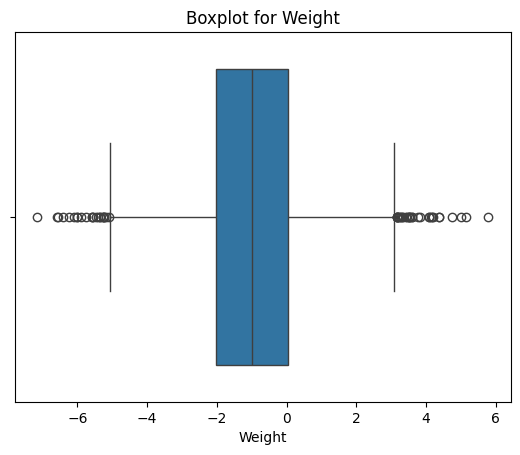

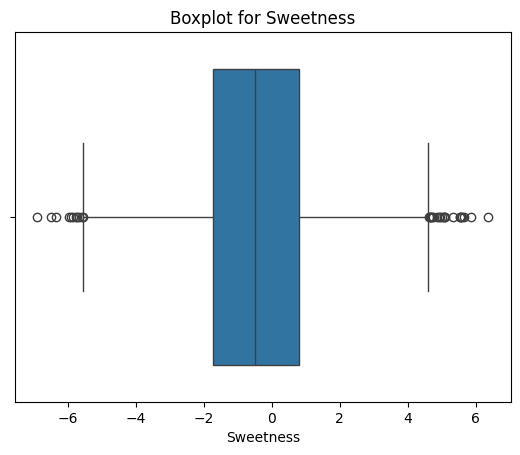

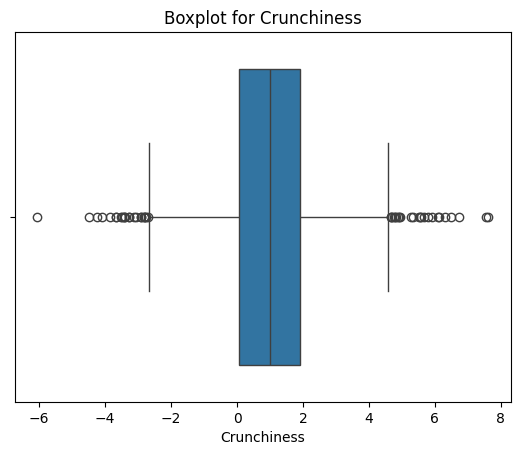

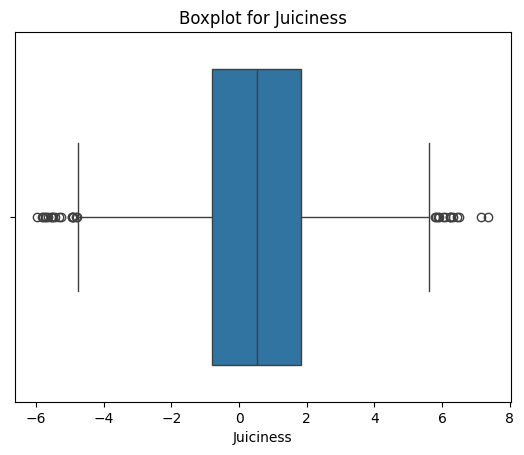

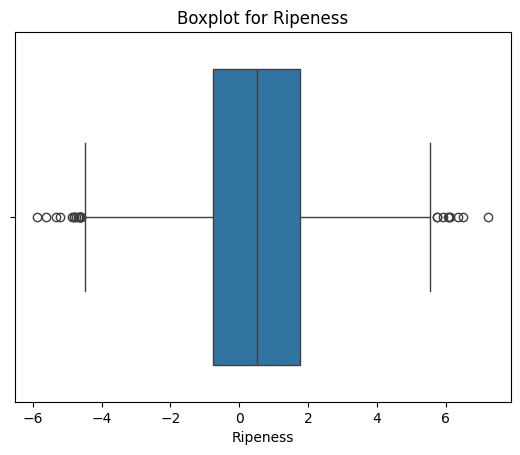

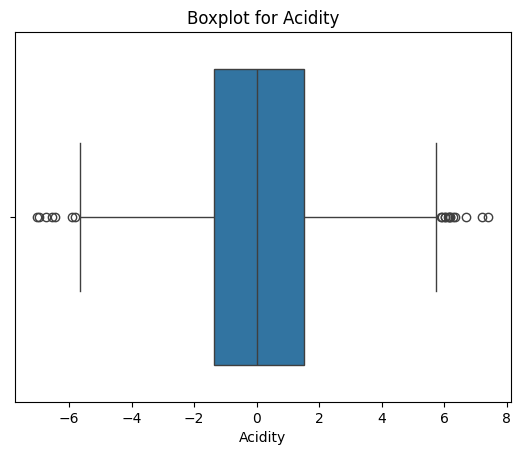

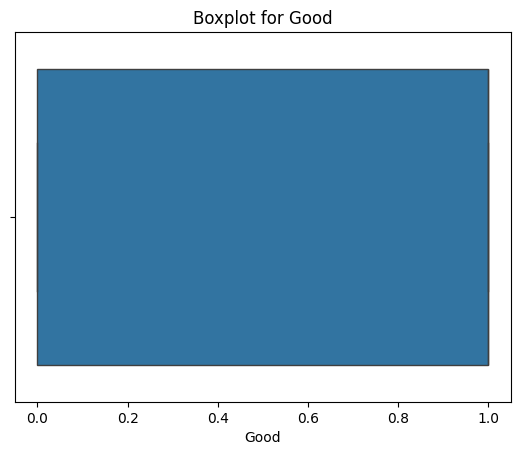

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

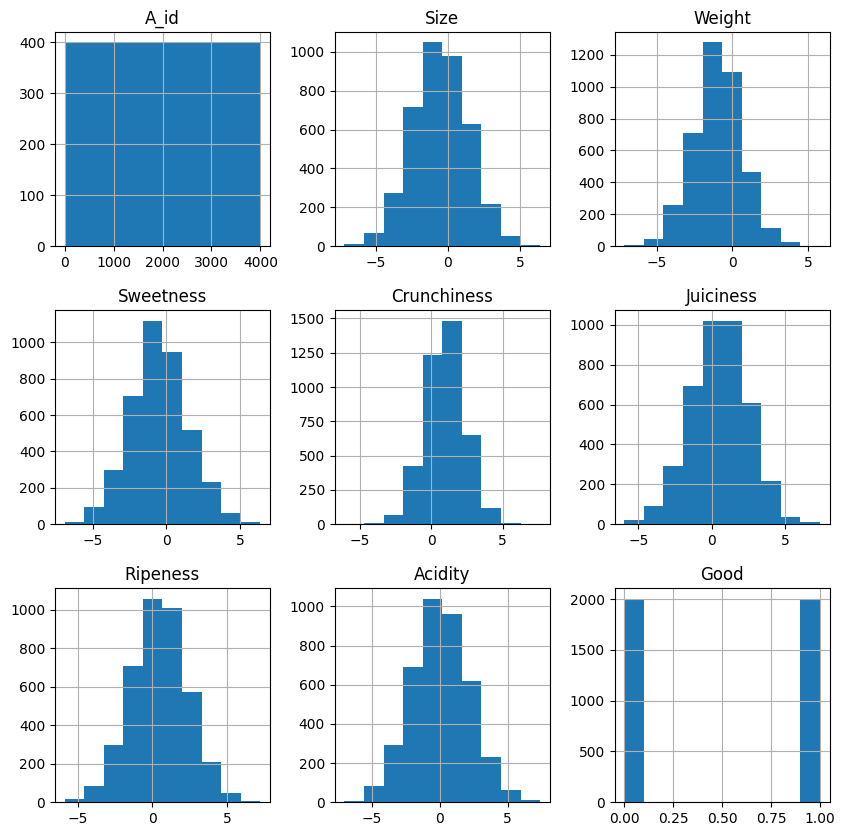

In [ ]:
# Histograms for numeric data
%matplotlib inline
df.hist(figsize=(10, 10))
plt.show()



In [ ]:
print(df['Good'].value_counts())
#Pretty balanced dataset.
#Accuracy would be a good metric to gauge model performance.

Good
1    2004
0    1996
Name: count, dtype: int64
